                                             Authors  \
0               Aguiar de Lima T.; Da Costa-Abreu M.   
1  da S. Medeiros D.R.; Torquato M.F.; Fernandes ...   
2  Vieira J.C.; Guedes L.A.; Santos M.R.; Sanchez...   
3  Flor D.; Pena D.; Pena L.; de Sousa V.A., Jr.;...   
4  Ribeiro V.; Greati V.; Bezerra A.; Silvano G.;...   

                                   Author full names  \
0  Aguiar de Lima, Thales (57192952811); Da Costa...   
1  da S. Medeiros, Denis R. (57845556200); Torqua...   
2  Vieira, Jusciaane Chacon (58781100000); Guedes...   
3  Flor, Daniel (57216582037); Pena, Danilo (5720...   
4  Ribeiro, Vinicius (57189895176); Greati, Vitor...   

                                        Author(s) ID  \
0                           57192952811; 14038905200   
1               57845556200; 57195314921; 7202947679   
2  58781100000; 35761038800; 57219689542; 5649554...   
3  57216582037; 57209855400; 57209848920; 6603844...   
4  57189895176; 57189887580; 57209738451; 5719

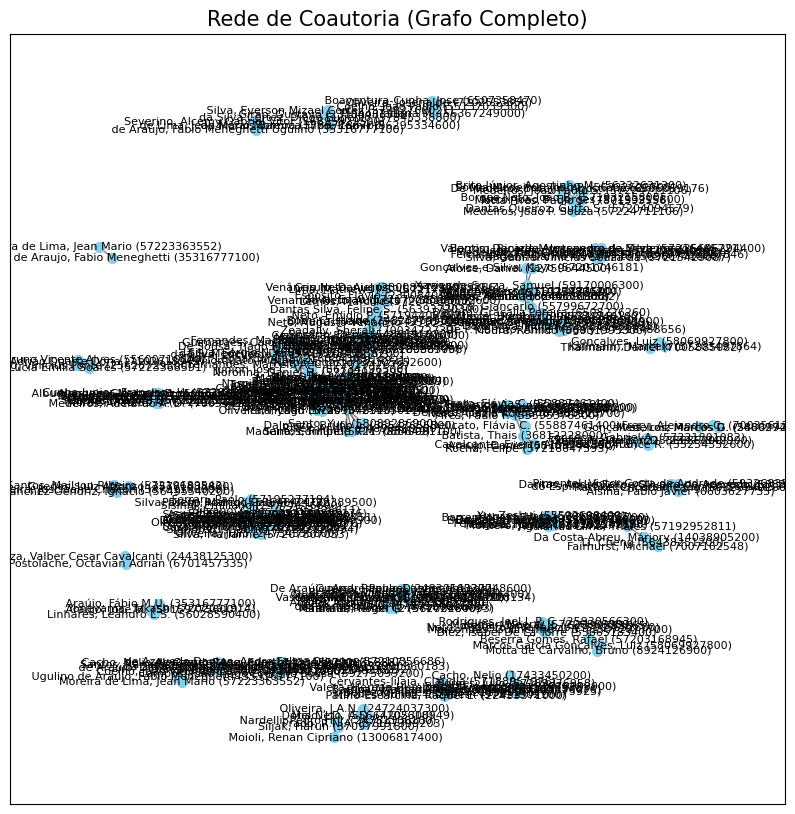

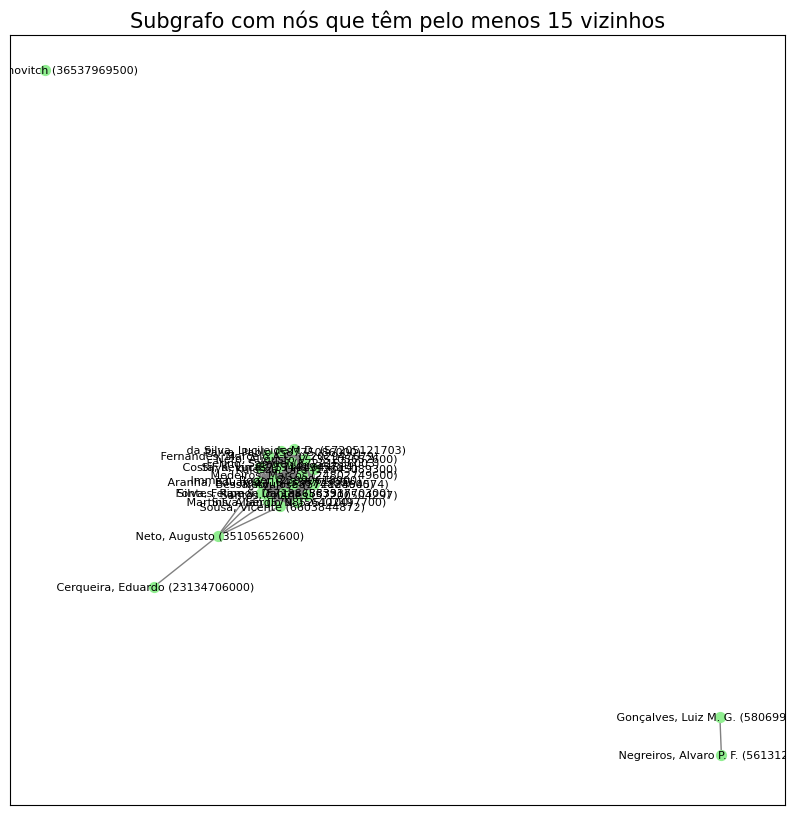

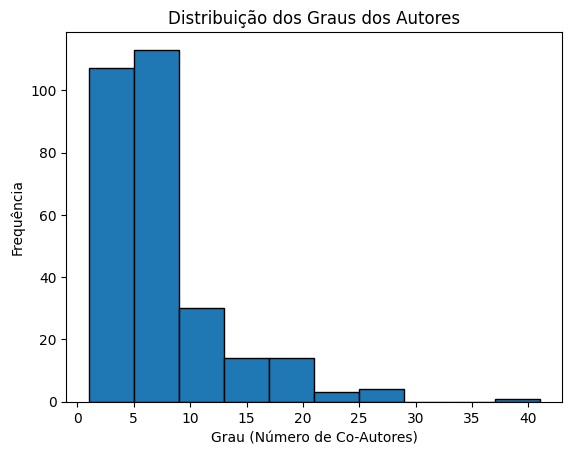

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd  # Biblioteca para manipulação de dados em forma de tabela (DataFrame)
import networkx as nx  # Biblioteca para criar e manipular grafos
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos estáticos
import plotly.graph_objects as go  # Biblioteca para criar gráficos interativos

# Carregando os dados do arquivo CSV
df = pd.read_csv('/content/scopus-11.csv')  # Lê o arquivo CSV e cria um DataFrame 'df'
print(df.head())  # Exibe as primeiras 5 linhas do DataFrame para conferir os dados

# Criar um grafo vazio para representar a rede de co-autoria
G = nx.Graph()  # Cria um grafo não direcionado vazio

# Iterar sobre cada linha do DataFrame (cada artigo)
for idx, row in df.iterrows():
    # Extrair a lista de autores do artigo, assumindo que os nomes estão separados por ponto e vírgula
    autores = row['Author full names'].split(';')
    # Adicionar uma aresta entre cada par de autores (representando a colaboração entre eles)
    for i in range(len(autores)):
        for j in range(i + 1, len(autores)):
            G.add_edge(autores[i], autores[j])  # Adiciona uma aresta entre os autores 'autores[i]' e 'autores[j]'

# Exibir algumas informações sobre o grafo de co-autoria
print(f"Número de nós: {G.number_of_nodes()}")  # Exibe o número de nós (autores) no grafo
print(f"Número de arestas: {G.number_of_edges()}")  # Exibe o número de arestas (colaborações) no grafo

# DENSIDADE
densidade = nx.density(G)  # Calcula a densidade da rede
print(f'Densidade da rede: {densidade}')  # Exibe a densidade do grafo

# Visualização estática simples do grafo completo
plt.figure(figsize=(10, 10))  # Define o tamanho da figura
pos = nx.spring_layout(G, seed=42)  # Define o layout do grafo (layout de mola)
nx.draw_networkx(G, pos, node_size=50, node_color='skyblue', edge_color='gray', font_size=8, with_labels=True)  # Desenha o grafo
plt.title('Rede de Coautoria (Grafo Completo)', size=15)  # Define o título do gráfico
plt.show()  # Exibe o gráfico estático

# CRIAR SUBGRAFO

# Criar o sub-grafo com pelo menos X vizinhos
X = 15  # Define o número mínimo de vizinhos para um nó ser incluído no subgrafo
nodes_with_X_neighbors = [n for n in G.nodes() if G.degree(n) >= X]  # Lista dos nós que têm pelo menos 'X' vizinhos
sub_grafo = G.subgraph(nodes_with_X_neighbors)  # Cria um subgrafo contendo apenas os nós da lista

# Visualização estática simples do subgrafo
plt.figure(figsize=(10, 10))  # Define o tamanho da figura
pos_sub = nx.spring_layout(sub_grafo, seed=42)  # Define o layout do subgrafo
nx.draw_networkx(sub_grafo, pos_sub, node_size=50, node_color='lightgreen', edge_color='gray', font_size=8, with_labels=True)  # Desenha o subgrafo
plt.title(f'Subgrafo com nós que têm pelo menos {X} vizinhos', size=15)  # Define o título do gráfico
plt.show()  # Exibe o gráfico estático

# HISTOGRAMA

# Obter os graus de todos os nós
graus = [G.degree(n) for n in G.nodes()]  # Obtém o grau de cada nó (número de coautores)

# Criar o histograma
plt.hist(graus, bins=10, edgecolor='black')  # Cria o histograma da distribuição dos graus
plt.title('Distribuição dos Graus dos Autores')  # Define o título do histograma
plt.xlabel('Grau (Número de Co-Autores)')  # Define o rótulo do eixo x
plt.ylabel('Frequência')  # Define o rótulo do eixo y
plt.show()  # Exibe o histograma
